In [ ]:
"""
케라스 RNN 신경망 => 크게 3가지 : SimpleRNN, LSTM, GRU
입력형식
LSTM(3, input_dim=1)
3 : 메모리 셀의 개수(Dense에서 출력뉴런수와 같은 의미)
input_dim : 입력 속성의 개수
input_length : 시퀀스 데이터의 입력 길이
ex)
hihell -> ihello

return_sequences : 시퀀스 출력 여부(true or false로 값을 줌)
many to many : return_sequences=True

stateful : 상태유지 모드
현재 샘플의 마지막 셀의 상태가 다음 샘플의 입력으로 전달할 것인지 여부를 지정
"""

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
path='C:/Users/student/Downloads/데이터들/'

In [50]:
def MinMaxScaler(data):
    # 정규화 작업
    denom=np.max(data,0)-np.min(data,0)
    num=data-np.min(data,0)
       
    return num/denom

In [52]:
xy=np.loadtxt(path+'실습데이터/data-02-stock_daily.csv', delimiter=',')
xy=xy[::-1]

In [65]:
seqLength=7 # window size
dataDim=5 # 시가 ,종가 ... 거래량 5개 컬럼
hiddenDim=10
outputDim=1
lr=0.01
iterations=500

In [54]:
trainSize=int(len(xy)*0.7) # 732
trainSet=xy[0:trainSize]
testSet=xy[trainSize-seqLength:]

In [55]:
trainSet=MinMaxScaler(trainSet)
testSet=MinMaxScaler(testSet)

In [57]:
def buildDataSet(timeSeries, seqLength):
    xdata=[]
    ydata=[]
    for i in range(0, len(timeSeries)-seqLength):
        tx=timeSeries[i:i+seqLength,:]
        ty=timeSeries[i+seqLength,[-1]]
        xdata.append(tx)
        ydata.append(ty)
        
    return np.array(xdata), np.array(ydata)

In [58]:
trainX, trainY=buildDataSet(trainSet,seqLength)
testX, testY=buildDataSet(testSet,seqLength)

In [60]:
trainX.shape
# 505개 샘플, 7(일주일), 5(5개 컬럼)
testY.shape

(220, 1)

In [62]:
x=tf.placeholder(tf.float32, [None, seqLength, dataDim])
y=tf.placeholder(tf.float32, [None, 1])


In [66]:
cell=tf.contrib.rnn.BasicLSTMCell( # RNN에서 안에 cell에 대해 정의한 부분
    num_units=hiddenDim, # 출력을 몇개 할지
    state_is_tuple=True, # is_Tuple=True => state를 ([1,2],[3,4]) 형식으로 출력  // False => 텐서 = [1,2,3,4]
    activation=tf.tanh
)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [68]:
outputs, _states=tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
yhat=tf.contrib.layers.fully_connected(outputs[:,-1], outputDim, activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


In [69]:
loss=tf.reduce_mean(tf.square(yhat-y))
train=tf.train.AdamOptimizer(lr).minimize(loss)

In [70]:
#rmse
targets=tf.placeholder(tf.float32, [None,1])
predictions=tf.placeholder(tf.float32, [None,1])
rmse=tf.sqrt(tf.reduce_mean(tf.square(targets-predictions)))

In [74]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _,cv=sess.run([train, loss], feed_dict={x:trainX,y:trainY})
        print("Step:{} loss:{}".format(i, cv))
    testPredict=sess.run(yhat, feed_dict={x:testX})
    rmsev=sess.run(rmse, feed_dict={targets:testY, predictions:testPredict})
    print("rmse value:{}".format(rmsev))

Step:0 loss:0.1456267237663269
Step:1 loss:0.06584447622299194
Step:2 loss:0.019529778510332108
Step:3 loss:0.011748802848160267
Step:4 loss:0.03102920763194561
Step:5 loss:0.04053309187293053
Step:6 loss:0.03301673382520676
Step:7 loss:0.019931869581341743
Step:8 loss:0.010030684061348438
Step:9 loss:0.006185334175825119
Step:10 loss:0.00722706550732255
Step:11 loss:0.010481540113687515
Step:12 loss:0.013524455949664116
Step:13 loss:0.014911314472556114
Step:14 loss:0.014226543717086315
Step:15 loss:0.011836521327495575
Step:16 loss:0.008577696979045868
Step:17 loss:0.005457826424390078
Step:18 loss:0.00336650968529284
Step:19 loss:0.0027933998499065638
Step:20 loss:0.0036220974288880825
Step:21 loss:0.005146245006471872
Step:22 loss:0.0064097810536623
Step:23 loss:0.006725633982568979
Step:24 loss:0.0060101100243628025
Step:25 loss:0.004714090842753649
Step:26 loss:0.0034760823473334312
Step:27 loss:0.002769963350147009
Step:28 loss:0.002729260129854083
Step:29 loss:0.003175449091941

Step:235 loss:0.0018332762410864234
Step:236 loss:0.0018303445540368557
Step:237 loss:0.001827421598136425
Step:238 loss:0.0018245072569698095
Step:239 loss:0.0018216012977063656
Step:240 loss:0.0018187050009146333
Step:241 loss:0.0018158170860260725
Step:242 loss:0.0018129381351172924
Step:243 loss:0.0018100684974342585
Step:244 loss:0.0018072081729769707
Step:245 loss:0.00180435657966882
Step:246 loss:0.001801514532417059
Step:247 loss:0.0017986815655604005
Step:248 loss:0.0017958577955141664
Step:249 loss:0.0017930440371856093
Step:250 loss:0.0017902397084981203
Step:251 loss:0.001787444343790412
Step:252 loss:0.0017846591072157025
Step:253 loss:0.0017818841151893139
Step:254 loss:0.001779117970727384
Step:255 loss:0.001776362070813775
Step:256 loss:0.0017736158333718777
Step:257 loss:0.0017708794912323356
Step:258 loss:0.0017681530443951488
Step:259 loss:0.0017654369585216045
Step:260 loss:0.001762730535119772
Step:261 loss:0.0017600343562662601
Step:262 loss:0.0017573483055457473


rmse value:0.04934781417250633


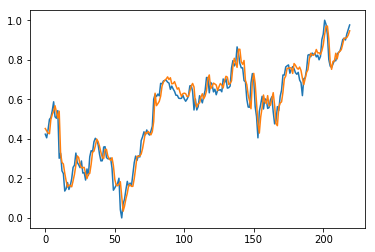

In [75]:
plt.plot(testY)
plt.plot(testPredict)
plt.show()

In [108]:
data=pd.read_csv(path+'삼성전자주가.csv', encoding='cp949')

In [109]:
data=data[::-1]

In [110]:
data



,일자,시가,고가,저가,종가,거래량
9287,19850104,130,130,129,129,111764
9286,19850105,129,129,128,128,108496
9285,19850107,129,130,128,129,771895
9284,19850108,129,129,127,127,845098
9283,19850109,126,126,122,123,324836
...,...,...,...,...,...,...
4,20191230,56200,56600,55700,55800,8356767
3,20200102,55500,56000,55000,55200,12993228
2,20200103,56000,56600,54900,55500,15422255
1,20200106,54900,55600,54600,55500,10278951


In [111]:
data=data.reset_index()

In [113]:
data=data[['시가','고가','저가','종가']]

In [116]:
xdata=data[['시가','고가','저가']]
ydata=data['종가']

In [124]:
ydata=np.array([ydata]).T

In [129]:
xdata=np.array(xdata)

In [132]:
xdata=MinMaxScaler(xdata)
ydata=MinMaxScaler(ydata)

In [135]:
window_size=30
